In [2]:
import matplotlib.pyplot as plt
from matplotlib import patches
import os

from skimage import data
from skimage.feature import Cascade
from skimage import io

import face_recognition
import tensorflow as tf
import cv2
import urllib
import xml.etree.ElementTree as ET
import io

In [3]:
current_path = os.getcwd()
bases_prontas_path = os.path.join("D:\\","FIA","TCC","BASES","Base_crua_com_anotacoes","")
print(bases_prontas_path)

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

D:\FIA\TCC\BASES\Base_crua_com_anotacoes\
1 Physical GPUs, 1 Logical GPUs


In [4]:
%matplotlib inline

# Face detection using a HOG model from face_recognition

In [5]:
# https://face-recognition.readthedocs.io/en/latest/face_recognition.html
image = face_recognition.load_image_file(bases_prontas_path+"imagem_nova13.png")
print(type(image))
print(image.shape)

<class 'numpy.ndarray'>
(974, 1300, 3)


In [6]:
def plot_detection_face_recognition(image, detected):
    # https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.imshow.html
    plt.imshow(image)

    # https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.gca.html
    #Get the current Axes instance on the current figure matching the given keyword args, or create one.
    img_desc = plt.gca()

    # https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.set_cmap.html
    # Set the default colormap, and applies it to the current image if any.
    plt.set_cmap('gray')


    # https://matplotlib.org/3.2.2/api/patches_api.html
    for rosto in detected:
        # A patch is a 2D artist with a face color and an edge color.
        img_desc.add_patch(
            #Rectangle(xy, width, height[, angle])
            #A rectangle with lower left at xy = (x, y) with specified width, height and rotation angle.
            patches.Rectangle(
                #xy(float, float) :The bottom and left rectangle coordinates
                (rosto[3], rosto[2]),
                rosto[2] - rosto[0],
                rosto[3] - rosto[1],
                fill=False,
                color='r',
                linewidth=2
            )
        )
    print(len(detected))
    plt.show()

In [7]:
face_locations_hog = face_recognition.face_locations(image)
# print(face_locations_hog)
# #A list of tuples of found face locations in css (top, right, bottom, left) order

12


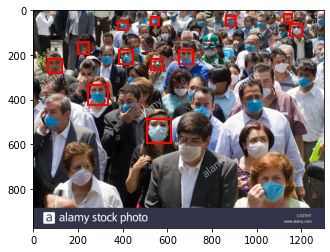

In [8]:
plot_detection_face_recognition(image,face_locations_hog)

# Compara a quantidade de rostos que cada modelo consegue reconhecer
Serão  usadas todas as imagens da base original e também das adicionadas

In [9]:
print(bases_prontas_path)
contador_face_recognition_HOG = 0

image_cortadas = os.path.join(current_path,"only_faces","")

image_list = [i for i in os.listdir(bases_prontas_path) if str(i).endswith('.png')]
total = len([i for i in os.listdir(image_cortadas) if str(i).endswith('.png')])

D:\FIA\TCC\BASES\Base_crua_com_anotacoes\


In [12]:
for foto in image_list:
    image = face_recognition.load_image_file(bases_prontas_path+"\\"+foto)
#     image = image.resize((64, 128))
#     contador_skimage += len(face_detection_cascade_classifier_from_skimage(image))
    contador_face_recognition_HOG += len(face_recognition.face_locations(image))
    
print(f"total de rostos classificados = {total}")
print(f"contador_face_recognition_HOG = {contador_face_recognition_HOG}")


total de rostos classificados = 6821
contador_face_recognition_HOG = 2601
